<a href="https://colab.research.google.com/github/amihlyaeva/python/blob/main/%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D0%BD%D0%B0%20%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5%20%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание.
Строим модели на основе деревьев.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/amihlyaeva/csv/refs/heads/main/titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Построить модели:
Decision Tree

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

x = titanic.loc[:,['Pclass','Age','Sex']]
y = titanic.loc[:,['Survived']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

dict = DictVectorizer(sparse=False)
x_train = dict.fit_transform(x_train.to_dict(orient='records'))
x_test = dict.transform(x_test.to_dict(orient='records'))
tree_model = DecisionTreeClassifier().fit(x_train,y_train)

tree_model.score(x_test,y_test)

0.8116591928251121

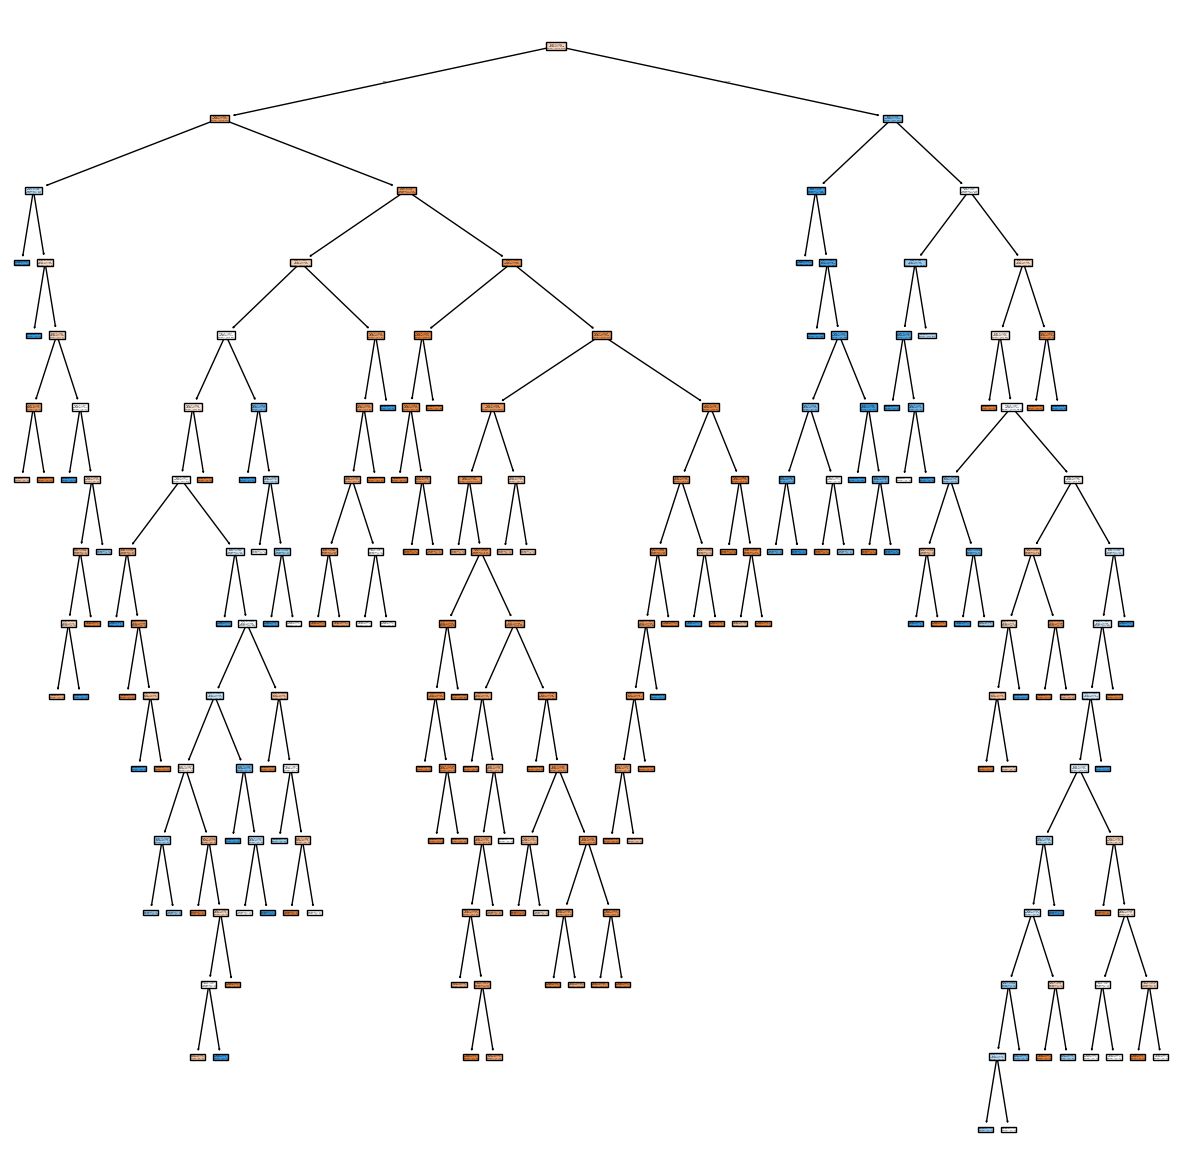

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 15))
_ = plot_tree(tree_model, filled=True)

In [ ]:
from sklearn.metrics import accuracy_score

tree_pred = tree_model.predict(x_test)
accuracy_score(y_test, tree_pred)

0.8026905829596412

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, tree_pred)

0.7078651685393258

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, tree_pred)

0.7777777777777778

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, tree_pred)
auc

0.7766181229773463

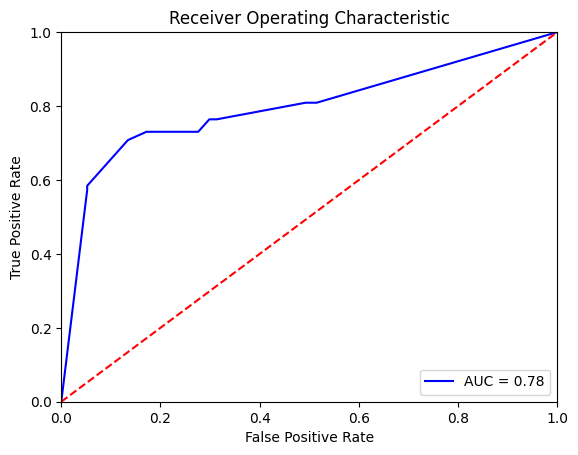

In [ ]:
import matplotlib.pyplot as plt

probs = tree_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


RandomForest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

titanic = pd.read_csv("https://raw.githubusercontent.com/amihlyaeva/csv/refs/heads/main/titanic.csv")

titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic.loc[titanic["Embarked"] == 'S', "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

x = titanic.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic.loc[:,['Survived']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(x_train, y_train)

forest.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7443946188340808

In [ ]:
from sklearn.metrics import accuracy_score

tree_pred = forest.predict(x_test)
accuracy_score(y_test, tree_pred)

0.7443946188340808

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, tree_pred)

0.6555555555555556

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, tree_pred)

0.6941176470588235

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, tree_pred)
auc

0.7300334168755221

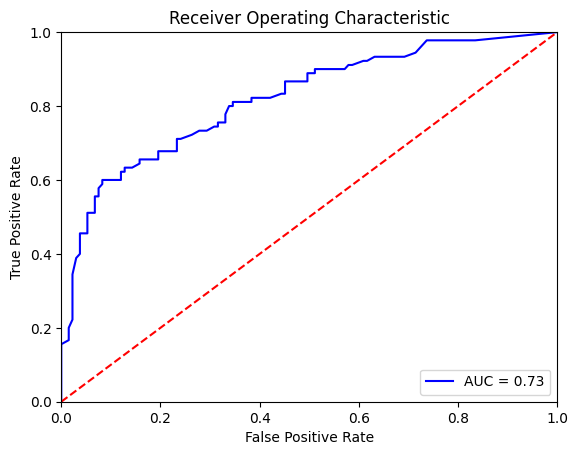

In [ ]:
import matplotlib.pyplot as plt

probs = forest.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GradientBosting(sklearn, LGBM, CatBoost, xgboost)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
import numpy as np

from catboost import Pool, CatBoost
from catboost.datasets import titanic

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
titanic_train, titanic_test = titanic()

In [ ]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train.Survived
X.drop(['Name', 'Ticket'], axis=1, inplace=True)
categorical_features_indices = np.where(X.dtypes != np.float64)[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

is_cat = (X.dtypes != float)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X_train[feature].fillna("NAN", inplace=True)
        X_test[feature].fillna("NAN", inplace=True)

cat_features_index = np.where(is_cat)[0]

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features_index)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features_index)

model = CatBoost(params={'loss_function': 'Logloss', 'one_hot_max_size': 255, 'verbose': 100})
model.fit(train_pool)


<ipython-input-16-bd53267b3441>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[feature].fillna("NAN", inplace=True)
<ipython-input-16-bd53267b3441>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Learning rate set to 0.008911
0:	learn: 0.6876852	total: 6.13ms	remaining: 6.12s
100:	learn: 0.4453800	total: 490ms	remaining: 4.36s
200:	learn: 0.3843960	total: 1.04s	remaining: 4.14s
300:	learn: 0.3677179	total: 1.47s	remaining: 3.4s
400:	learn: 0.3576208	total: 1.82s	remaining: 2.72s
500:	learn: 0.3508086	total: 2.03s	remaining: 2.02s
600:	learn: 0.3425538	total: 2.24s	remaining: 1.49s
700:	learn: 0.3362400	total: 2.45s	remaining: 1.04s
800:	learn: 0.3305448	total: 2.66s	remaining: 662ms
900:	learn: 0.3246936	total: 2.9s	remaining: 319ms
999:	learn: 0.3195090	total: 3.17s	remaining: 0us


In [ ]:
from sklearn.metrics import accuracy_score

tree_pred = model.predict(test_pool, prediction_type="Class")
accuracy_score(y_test, tree_pred)

0.8100558659217877

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, tree_pred)

0.24242424242424243

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, tree_pred)

0.3333333333333333

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, tree_pred)
auc

0.7300334168755221

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
titanic_train = pd.read_csv("https://raw.githubusercontent.com/amihlyaeva/csv/refs/heads/main/titanic.csv")
titanic_test = pd.read_csv("https://raw.githubusercontent.com/amihlyaeva/csv/refs/heads/main/titanic.csv")

In [ ]:
test_passenger_ids = titanic_test.pop('PassengerId')
titanic_train.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
embarked_encoder = LabelEncoder()
embarked_encoder.fit(titanic_train['Embarked'].fillna('Null'))

LabelEncoder()

In [ ]:
df_list = [titanic_train, titanic_test]

In [ ]:
for df in df_list:

    # Record anyone travelling alone
    df['Alone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)

    # Transform 'Embarked'
    df['Embarked'].fillna('Null', inplace=True)
    df['Embarked'] = embarked_encoder.transform(df['Embarked'])

    # Transform 'Sex'
    df.loc[df['Sex'] == 'female','Sex'] = 0
    df.loc[df['Sex'] == 'male','Sex'] = 1
    df['Sex'] = df['Sex'].astype('int8')

    # Drop features that seem unusable. Save passenger ids if test
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

<ipython-input-12-11ffc5e47697>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('Null', inplace=True)
<ipython-input-12-11ffc5e47697>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
y = titanic_train.pop('Survived')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titanic_train, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = ['Alone', 'Sex', 'Pclass', 'Embarked']

In [ ]:
lgbm_params = {
    'boosting': 'dart',          # dart (drop out trees) often performs better
    'application': 'binary',     # Binary classification
    'learning_rate': 0.05,       # Learning rate, controls size of a gradient descent step
    'min_data_in_leaf': 10,      # Data set is quite small so reduce this a bit
    'num_leaves': 41,            # Controls size of tree since LGBM uses leaf wise splits
    'metric': 'binary_logloss',  # Area under ROC curve as the evaulation metric
              }

In [ ]:
train_dataset = lgbm.Dataset(data=X_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
test_dataset = lgbm.Dataset(data=X_test, label=y_test, categorical_feature=categorical_features, free_raw_data=False)

In [ ]:
evaluation_results = {}
clf = lgbm.train(train_set=train_dataset,
                 params=lgbm_params,
                 valid_sets=[test_dataset],
                 valid_names=['Test'],
                 num_boost_round=100,
                )

optimum_boost_rounds = clf.best_iteration

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838


In [ ]:
preds = np.round(clf.predict(X_test))
preds

array([0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1.])

In [ ]:
accuracy_score(y_test, preds)

0.8044692737430168

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, preds)

0.7162162162162162

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, preds)

0.7910447761194029

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, preds)
auc

0.7914414414414415

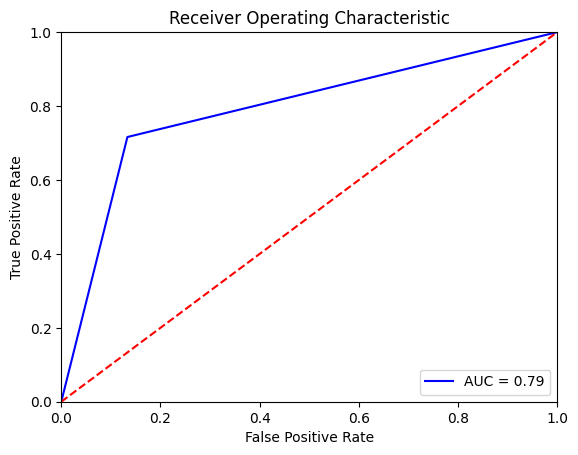

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, preds)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/amihlyaeva/csv/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv")
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
dataset['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
dataset['RiskLevel'] = dataset['RiskLevel'].replace('low risk', 0).replace('mid risk', 1).replace('high risk', 2)

<ipython-input-43-dc71810ad334>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['RiskLevel'] = dataset['RiskLevel'].replace('low risk', 0).replace('mid risk', 1).replace('high risk', 2)


In [ ]:
y = dataset['RiskLevel']
X = dataset.drop(['RiskLevel'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3,
                             max_depth=2,
                             random_state=SEED)

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


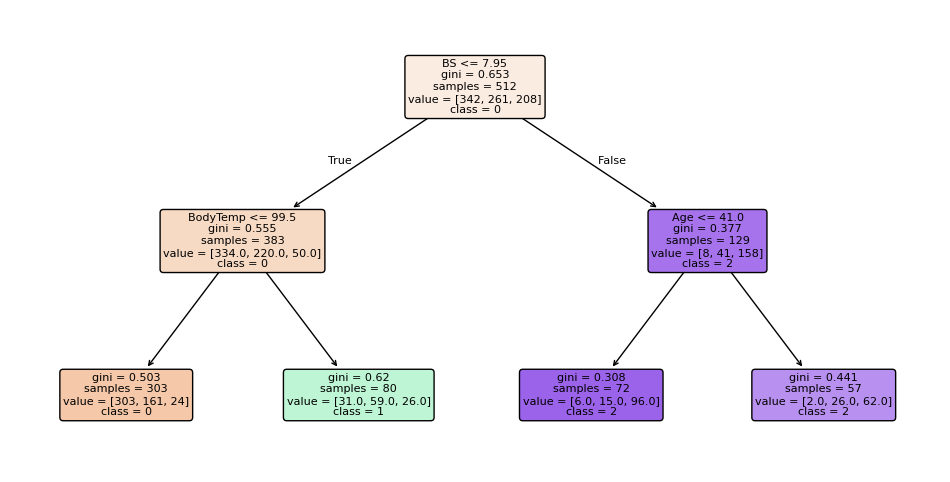

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


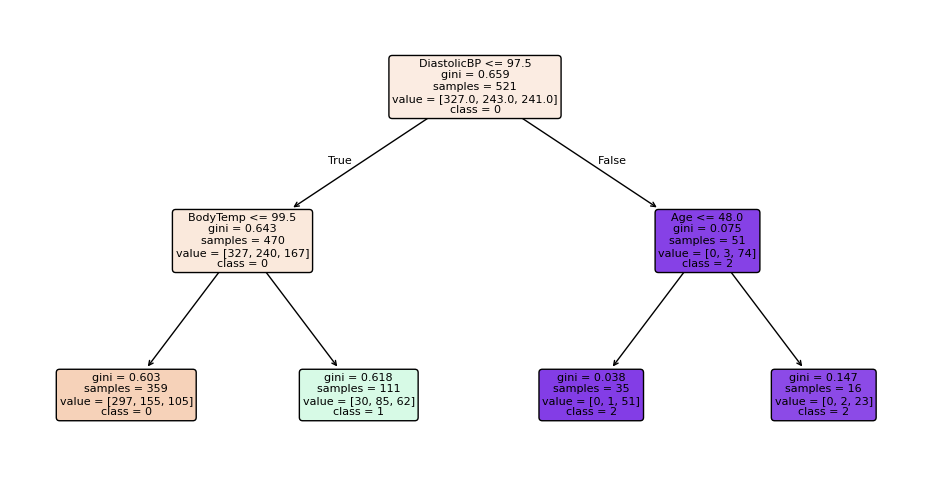

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


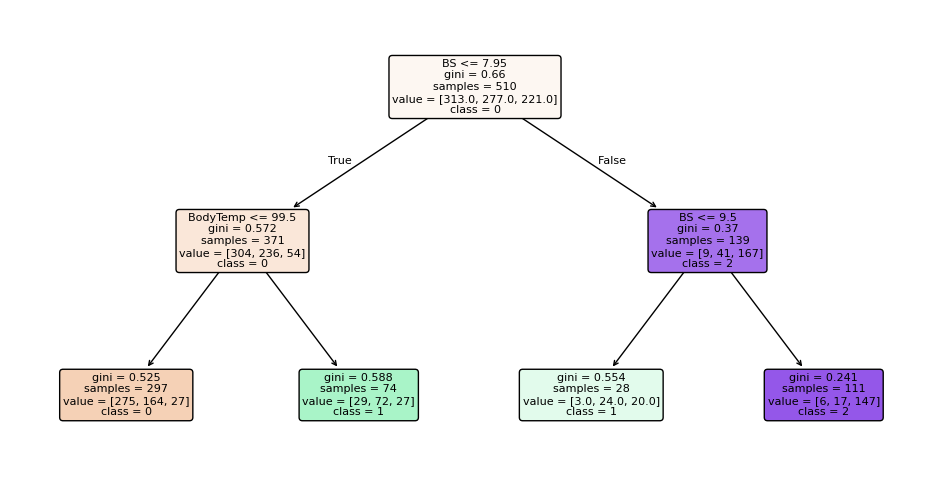

In [ ]:
from sklearn import tree

features = X.columns.values
classes = ['0', '1', '2']
for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.53      0.89      0.66        80
           1       0.57      0.17      0.26        76
           2       0.74      0.72      0.73        47

    accuracy                           0.58       203
   macro avg       0.61      0.59      0.55       203
weighted avg       0.59      0.58      0.53       203



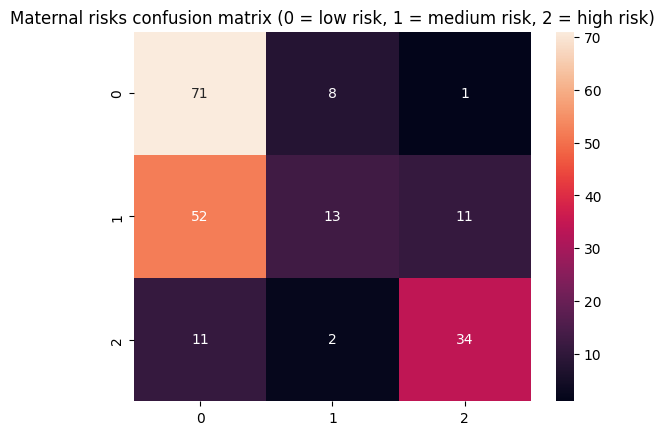

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42

y = dataset['BS']
X = dataset.drop(['BS'], axis=1) # You can either include risk level or drop it here

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20, # 20 trees
                            max_depth=3, # 4 levels
                            random_state=SEED)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

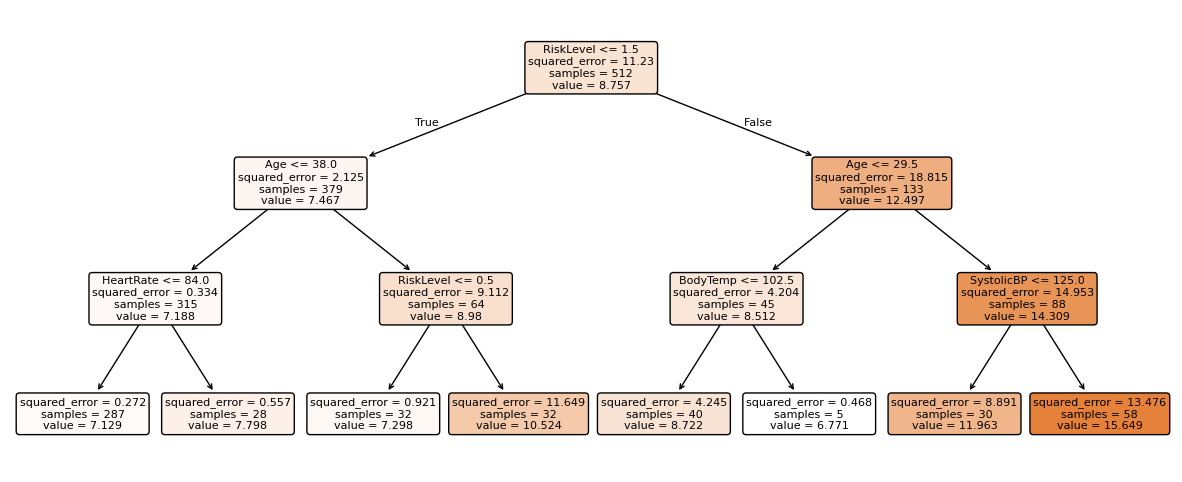

In [ ]:
from sklearn import tree

features = X.columns
# Obtain just the first tree
first_tree = rfr.estimators_[0]

plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,
               feature_names=features,
               fontsize=8,
               filled=True,
               rounded=True);

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.127893702896059
Mean Squared Error: 3.0802988503933326
Root Mean Squared Error: 1.755078018320933


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 7.3211021 , 11.37810371, 17.02113095,  7.37122753,  7.02093998,
        7.08184804,  6.94176093,  8.40171267,  8.79562331,  7.09178886,
       14.90583396,  7.11766774,  7.11455243,  9.10610787,  7.3211021 ,
        8.71910529,  8.66106395,  9.26337392,  7.02485607,  7.3211021 ,
        7.13172055,  7.09888927,  6.94904346, 16.06921881,  7.20189121,
        6.4420716 ,  9.24913646,  6.86190102,  9.71567976,  7.15407774,
        7.34619662, 14.58889254,  7.16185186,  7.11455243,  6.93732108,
       17.87289146, 11.86621337,  6.86190102,  7.36211823, 13.92470498,
       15.07623896,  7.09888927,  8.19075851,  8.98912235,  7.11411871,
        7.55633671,  9.24913646,  7.3211021 ,  7.09133393,  7.10804783,
        7.10804783,  7.17744885,  7.37122753,  7.17744885,  7.13172055,
        7.08184804,  8.66106395,  7.02485607,  7.81022872,  7.36211823,
        7.10804783,  7.15098687,  7.13172055,  6.86190102,  7.09293126,
        9.27587633, 17.01851094,  6.77958272,  7.59317817,  7.51

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(f"Cross-validated MSE: {-np.mean(scores)}")

Cross-validated MSE: 1.802004049204103
